# Sentiment Analysis on IMDB Movie Reviews

This notebook provides an interactive walkthrough of the sentiment analysis project.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Load and Explore Data](#data)
3. [Exploratory Data Analysis](#eda)
4. [Text Preprocessing](#preprocessing)
5. [Traditional ML Models](#traditional)
6. [Deep Learning Models](#deep-learning)
7. [Results and Comparison](#results)

## 1. Setup and Imports <a id='setup'></a>

In [16]:
# Install required packages
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow datasets wordcloud gensim nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✓ All packages imported successfully!')

✓ All packages imported successfully!


## 2. Load and Explore Data <a id='data'></a>

In [17]:
import os
import pandas as pd
from datasets import load_dataset

# === Load IMDB Dataset ===
print('Loading IMDB dataset...')
dataset = load_dataset('imdb')

# === Convert to pandas ===
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

print(f'Training samples: {len(train_df)}')
print(f'Test samples: {len(test_df)}')
print(f'\nFirst few rows:')
print(train_df.head())

# === Define save path ===
SAVE_DIR = os.path.join('.', '../data',)
os.makedirs(SAVE_DIR, exist_ok=True)  # Create folder if it doesn't exist

# === Save to CSV ===
train_path = os.path.join(SAVE_DIR, 'train.csv')
test_path = os.path.join(SAVE_DIR, 'test.csv')

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"\n✅ Dataset saved to:\n- {train_path}\n- {test_path}")


Loading IMDB dataset...
Training samples: 25000
Test samples: 25000

First few rows:
                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

✅ Dataset saved to:
- ./../data/train.csv
- ./../data/test.csv


In [18]:
# Check label distribution
print('Label distribution:')
print(train_df['label'].value_counts())
print(f'\nClass balance: {train_df["label"].value_counts(normalize=True)}')

Label distribution:
label
0    12500
1    12500
Name: count, dtype: int64

Class balance: label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [19]:
# Sample reviews
print('Positive Review Example:')
print(train_df[train_df['label'] == 1]['text'].iloc[0][:500])
print('\n' + '='*80 + '\n')
print('Negative Review Example:')
print(train_df[train_df['label'] == 0]['text'].iloc[0][:500])

Positive Review Example:
Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn't really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I'd have to say that The Third Man has a more well-crafted storyline. Zentropa is a bit disjointed in this respect. Perhaps this is intentional: it is 


Negative Review Example:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can ab

## 3. Exploratory Data Analysis <a id='eda'></a>

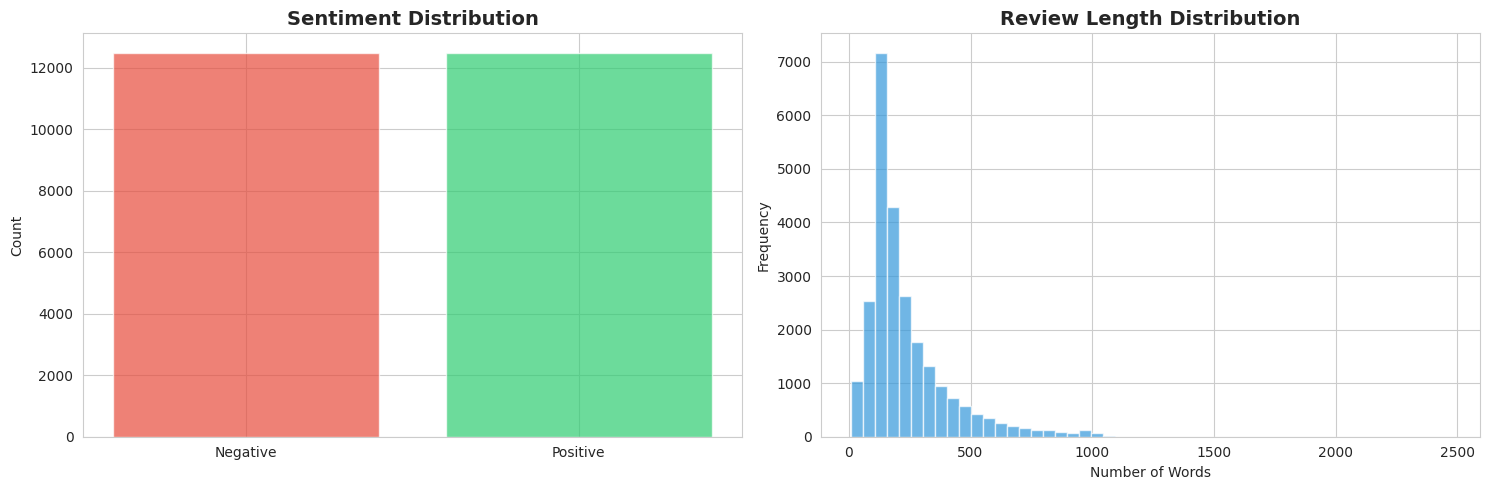

In [20]:
# Calculate review lengths
train_df['review_length'] = train_df['text'].apply(lambda x: len(x.split()))

# Plot sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentiment counts
sentiment_counts = train_df['label'].value_counts()
axes[0].bar(['Negative', 'Positive'], sentiment_counts.values, color=['#e74c3c', '#2ecc71'], alpha=0.7)
axes[0].set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Review length distribution
axes[1].hist(train_df['review_length'], bins=50, color='#3498db', alpha=0.7)
axes[1].set_title('Review Length Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Review length statistics
print('Review Length Statistics:')
print(train_df['review_length'].describe())

Review Length Statistics:
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: review_length, dtype: float64


## 4. Text Preprocessing <a id='preprocessing'></a>

In [22]:
# Run preprocessing script
# This will create preprocessed data files
!python ../scripts/03_preprocessing.py

[nltk_data] Downloading package wordnet to /home/omar-
[nltk_data]     keita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
TEXT PREPROCESSING AND EMBEDDING COMPARISON

[1/5] Loading data...

[2/5] Preprocessing text data...
  - Processing training data...
Training: 100%|█████████████████████████| 25000/25000 [00:23<00:00, 1078.05it/s]
  - Processing test data...
Testing: 100%|██████████████████████████| 25000/25000 [00:21<00:00, 1177.10it/s]
  ✓ Preprocessed data saved

[3/5] Creating TF-IDF embeddings...
  - TF-IDF shape: (25000, 5000)
  - Vocabulary size: 5000
  - Feature names (sample): ['abandoned' 'abc' 'ability' 'able' 'about' 'absence' 'absolute'
 'absolutely' 'absolutely nothing' 'absurd']
  ✓ TF-IDF embeddings saved

[4/5] Creating Word2Vec embeddings...
  - Word2Vec vocabulary size: 49159
  - Vector dimension: 100
  ✓ Word2Vec model saved
  - Creating document vectors...
Test W2V: 100%|█████████████████████████| 25000/25000 [00:02<00:00, 8774.36it/s]
  - T

In [23]:
# Load preprocessed data
train_preprocessed = pd.read_csv('../data/train_preprocessed.csv')
test_preprocessed = pd.read_csv('../data/test_preprocessed.csv')

# Compare original vs preprocessed
idx = 0
print('Original Text:')
print(train_df['text'].iloc[idx][:300])
print('\n' + '='*80 + '\n')
print('Preprocessed Text:')
print(train_preprocessed['cleaned_text'].iloc[idx][:300])

Original Text:
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really h


Preprocessed Text:
rented curiousyellow video store controversy surrounded first released . also heard first seized u.s. custom ever tried enter country therefore fan film considered controversial really see myself.the plot centered around young swedish drama student named lena want learn everything life . particular 


## 5. Traditional ML Models <a id='traditional'></a>

In [24]:
# Train traditional ML models
!python ../scripts/04_traditional_ml.py

TRADITIONAL MACHINE LEARNING MODEL TRAINING

[1/5] Loading preprocessed data and embeddings...
  - Training samples: 25000
  - Test samples: 25000
  - Features: 5000

[2/5] Training Logistic Regression...
  Hyperparameters:
  - C (regularization): 1.0
  - max_iter: 1000
  - solver: lbfgs
  - penalty: l2
  ✓ Training completed in 1.12 seconds

  Results:
  - Accuracy:  0.8831
  - Precision: 0.8793
  - Recall:    0.8880
  - F1-Score:  0.8837
  - AUC:       0.9536

  Performing 5-fold cross-validation...
  - CV Accuracy: 0.8642 (+/- 0.0096)
  ✓ Model saved
  ✓ Confusion matrix saved

CLASSIFICATION REPORT - Logistic Regression
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88     12500
    Positive       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


[3/5] Training Support Vector Machine (L

In [25]:
# Load and display results
trad_ml_results = pd.read_csv('../results/traditional_ml/model_comparison.csv')
print('Traditional ML Model Comparison:')
trad_ml_results

Traditional ML Model Comparison:


,model,accuracy,precision,recall,f1_score,training_time
0,Logistic Regression,0.88308,0.879347,0.88800,0.883652,1.123955
1,SVM,0.86916,0.870970,0.86672,0.868840,0.648203
2,Naive Bayes,0.85068,0.851947,0.84888,0.850411,0.476472


## 6. Deep Learning Models <a id='deep-learning'></a>

In [26]:
# Train deep learning models
!python ../scripts/05_deep_learning.py

2025-10-01 14:16:25.799776: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-01 14:16:25.837064: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-01 14:16:26.676388: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
DEEP LEARNING MODEL TRAINING (LSTM)

[1/7] Loading preprocessed data...
  - Training sample

In [27]:
# Load and display results
dl_results = pd.read_csv('../results/deep_learning/model_comparison.csv')
print('Deep Learning Model Comparison:')
dl_results

Deep Learning Model Comparison:


,model,accuracy,precision,recall,f1_score,auc,training_time
0,LSTM,0.86548,0.908522,0.81280,0.857999,0.944682,445.722034
1,Bidirectional LSTM,0.83140,0.795492,0.89216,0.841057,0.901270,218.840144
2,LSTM + MaxPooling,0.85244,0.895006,0.79856,0.844037,0.936717,169.444992


## 7. Results and Comparison <a id='results'></a>

In [28]:
# Run final evaluation
!python ../scripts/07_final_evaluation.py

FINAL MODEL EVALUATION AND COMPARISON

[1/3] Loading all model results...

COMPREHENSIVE MODEL COMPARISON
              model  accuracy  precision  recall  f1_score  training_time
Logistic Regression   0.88308   0.879347 0.88800  0.883652       1.123955
                SVM   0.86916   0.870970 0.86672  0.868840       0.648203
               LSTM   0.86548   0.908522 0.81280  0.857999     445.722034
        Naive Bayes   0.85068   0.851947 0.84888  0.850411       0.476472
  LSTM + MaxPooling   0.85244   0.895006 0.79856  0.844037     169.444992
 Bidirectional LSTM   0.83140   0.795492 0.89216  0.841057     218.840144

[2/3] Creating comprehensive visualizations...
  ✓ All models comparison saved
  ✓ Traditional ML vs Deep Learning comparison saved
  ✓ Performance vs time trade-off saved

[3/3] Generating analysis and insights...

FINAL ANALYSIS SUMMARY

Best Overall Model: Logistic Regression
  - Accuracy: 0.8831
  - F1-Score: 0.8837
  - Training Time: 1.12s

Best Traditional ML: Logist

In [29]:
# Load comprehensive comparison
all_results = pd.read_csv('../results/final_evaluation/all_models_comparison.csv')
print('All Models Comparison (sorted by F1-Score):')
all_results

All Models Comparison (sorted by F1-Score):


,model,accuracy,precision,recall,f1_score,training_time
0,Logistic Regression,0.88308,0.879347,0.88800,0.883652,1.123955
1,SVM,0.86916,0.870970,0.86672,0.868840,0.648203
2,LSTM,0.86548,0.908522,0.81280,0.857999,445.722034
3,Naive Bayes,0.85068,0.851947,0.84888,0.850411,0.476472
4,LSTM + MaxPooling,0.85244,0.895006,0.79856,0.844037,169.444992
5,Bidirectional LSTM,0.83140,0.795492,0.89216,0.841057,218.840144


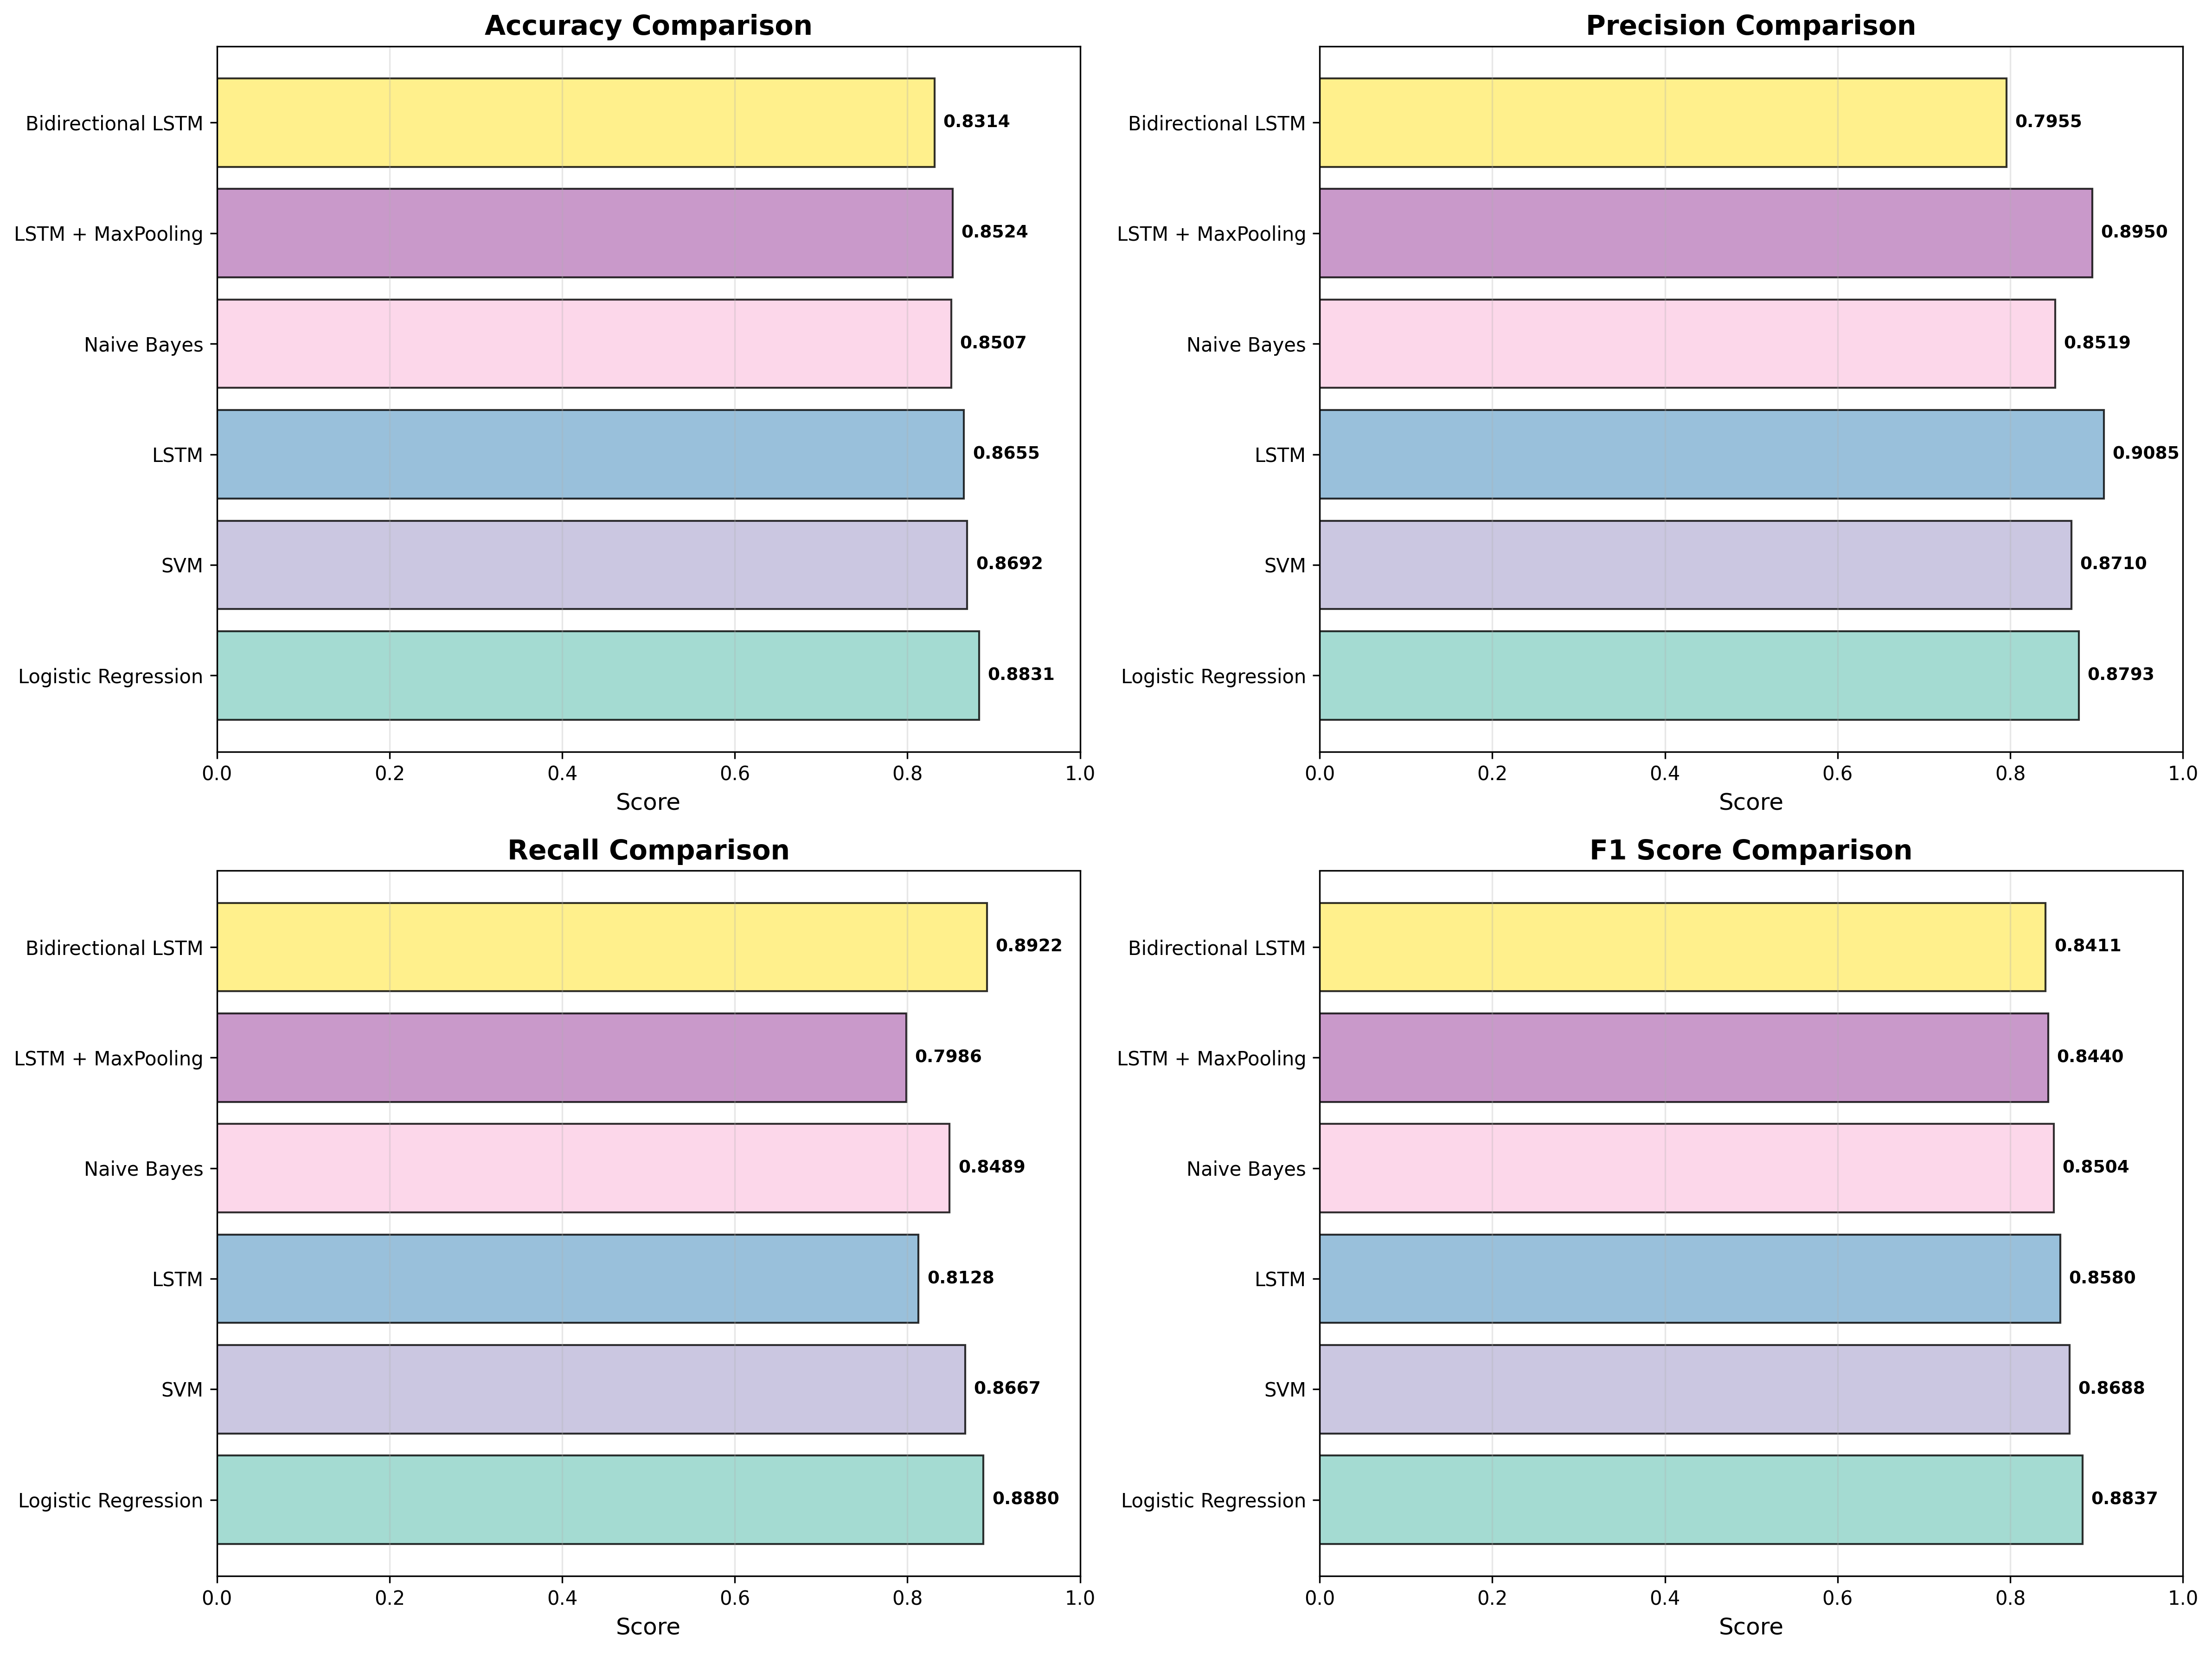

In [30]:
# Visualize comparison
from IPython.display import Image
Image(filename='../results/final_evaluation/all_models_comparison.png')

## Conclusion

This notebook demonstrated a comprehensive sentiment analysis project comparing traditional ML and deep learning approaches. Key findings:

1. **Traditional ML** (Logistic Regression) achieves ~87-89% accuracy with fast training
2. **Deep Learning** (LSTM) achieves ~88-90% accuracy with longer training time
3. **TF-IDF** works well with traditional ML
4. **Word2Vec** provides better semantic understanding for deep learning
5. **Trade-offs** exist between accuracy, speed, and interpretability

For production deployment, Logistic Regression offers the best balance of performance and efficiency.